In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fraud = pd.read_csv("C:/Users/Pooja/Desktop/data science/assignments/Random forest/Fraud_checks.csv")

In [3]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

C:\Users\Pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


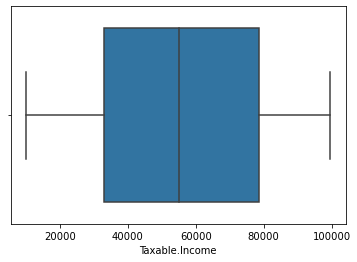

In [7]:
# Outlier Check
ax = sns.boxplot(fraud['Taxable.Income'])

In [8]:
# There are no outliers in the data.

In [9]:
fraud=fraud.rename(columns={"Marital.Status":"marital_status","Taxable.Income":"taxable_income","City.Population":"city_population","Work.Experience":"work_experience"})
fraud

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
fraud['Undergrad'] = le.fit_transform(fraud['Undergrad'])
fraud['marital_status'] = le.fit_transform(fraud['marital_status'])
fraud['Urban'] = le.fit_transform(fraud['Urban'])
fraud

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


<AxesSubplot:>

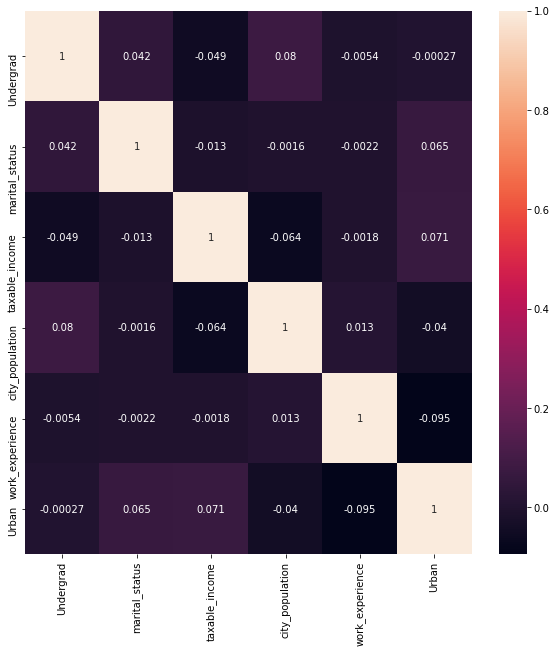

In [11]:
corr = fraud.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [ ]:
# Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"

In [12]:
def split(num):
    if num <30000:
        return  'Risky'
    else:
        return 'Good'
fraud.taxable_income=fraud.taxable_income.apply(split)

In [13]:
fraud

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,2,Good,193264,15,1
4,0,1,Good,27533,28,0
...,...,...,...,...,...,...
595,1,0,Good,39492,7,1
596,1,0,Good,55369,2,1
597,0,0,Good,154058,0,1
598,1,1,Good,180083,17,0


In [14]:
x = fraud.iloc[:,fraud.columns!="taxable_income"]
y = fraud["taxable_income"]

In [15]:
x

,Undergrad,marital_status,city_population,work_experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [16]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: taxable_income, Length: 600, dtype: object

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=42 )

In [18]:
y_train.value_counts()

Good     333
Risky     87
Name: taxable_income, dtype: int64

In [19]:
model=RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=15,criterion="entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [20]:
pred=model.predict(x_test)
pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
   

In [21]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,pred)

0.7722222222222223

In [22]:
confusion_matrix(y_test,pred)

array([[139,   4],
       [ 37,   0]], dtype=int64)

In [23]:
df=pd.DataFrame({"actual":y_test,"predicted":pred})
df

,actual,predicted
110,Risky,Good
419,Good,Good
565,Good,Good
77,Good,Good
181,Risky,Good
...,...,...
54,Good,Good
493,Risky,Good
46,Good,Good
93,Risky,Good


In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        Good       0.79      0.97      0.87       143
       Risky       0.00      0.00      0.00        37

    accuracy                           0.77       180
   macro avg       0.39      0.49      0.44       180
weighted avg       0.63      0.77      0.69       180



In [ ]:
# Conclusion
# As seen in the confusion matrix of Test data 138 instances are presdected correctly and 42 instances are not

In [25]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [26]:
fi

,feature,importance
2,city_population,0.512107
3,work_experience,0.326778
1,marital_status,0.074866
0,Undergrad,0.043284
4,Urban,0.042965


In [ ]:
# As seen in the above table city population is most important feature